### Segunda Evaluación Física Computacional 1 (2021-1)

(5 de Abril de 2021)

Se pide resolver numéricamente la ecuación diferencial de un [oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal](https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force), con ayuda de la función *odeint* de *scipy.integrate*.

La ecuación diferencial del oscilador amortiguado es

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}

y $\zeta$ es la tasa de amortiguamiento dado por la expresión

\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}

siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire. 

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$). 

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:


* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular. 



**Problema1.**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$: 

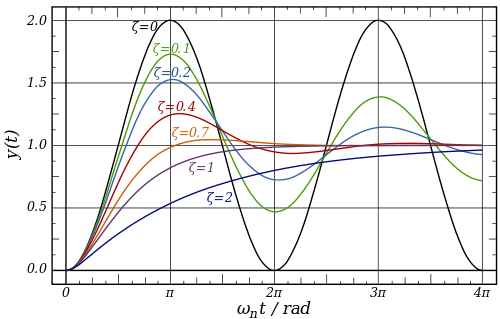

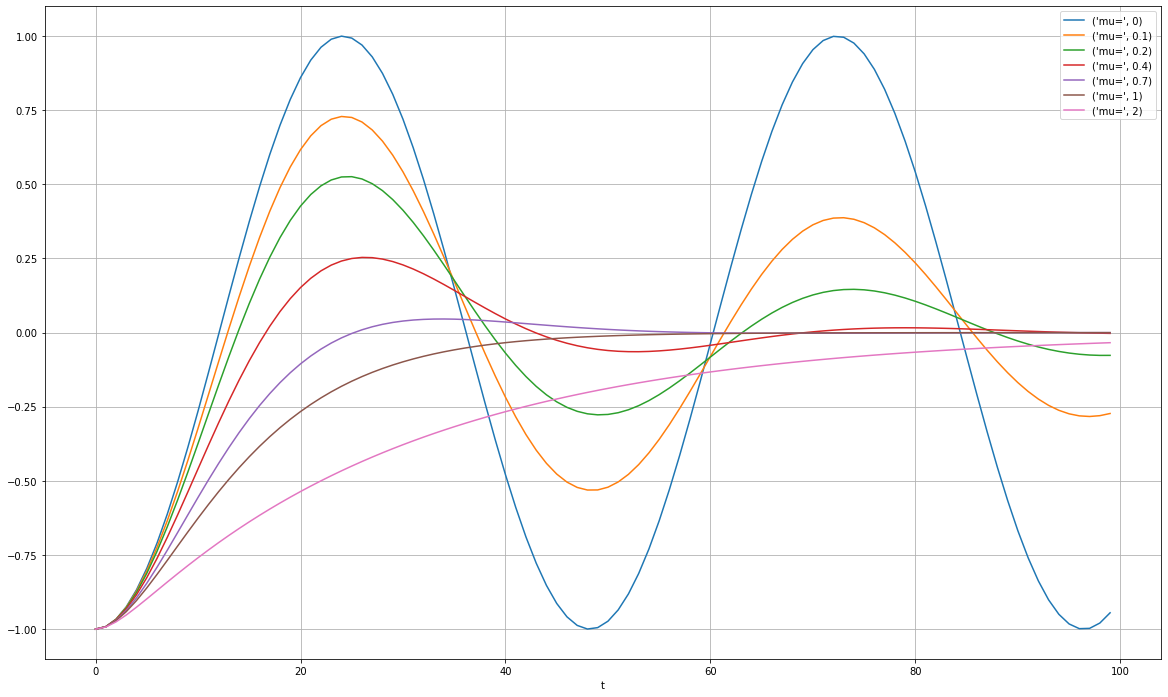

In [91]:

# Integración utilizando 'odeint'
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
import numpy as np

def VanderPol(y,t,Wn,C):
        x, p = y
        dydt = [p, (-2)*C*Wn*p-x*Wn**(2)]
        return dydt

t = np.linspace(0,4.3,100)

k=9.
m=1.

Wn=np.sqrt(k/m)

t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [-1, 0]




plt.figure(figsize=(20,12))

for C in [0, 0.1, 0.2, 0.4, 0.7, 1, 2]:
  sol=odeint(VanderPol, y_0, t, args=(Wn,C,))
  y=sol[:,0] 
  plt.plot(y, label=('mu=',C))
  plt.legend(loc='best')
  plt.xlabel('t')
  plt.grid()
plt.show()


**Problema 2.**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

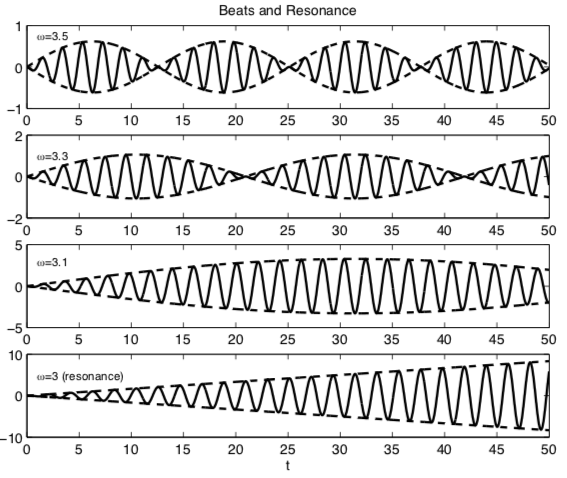

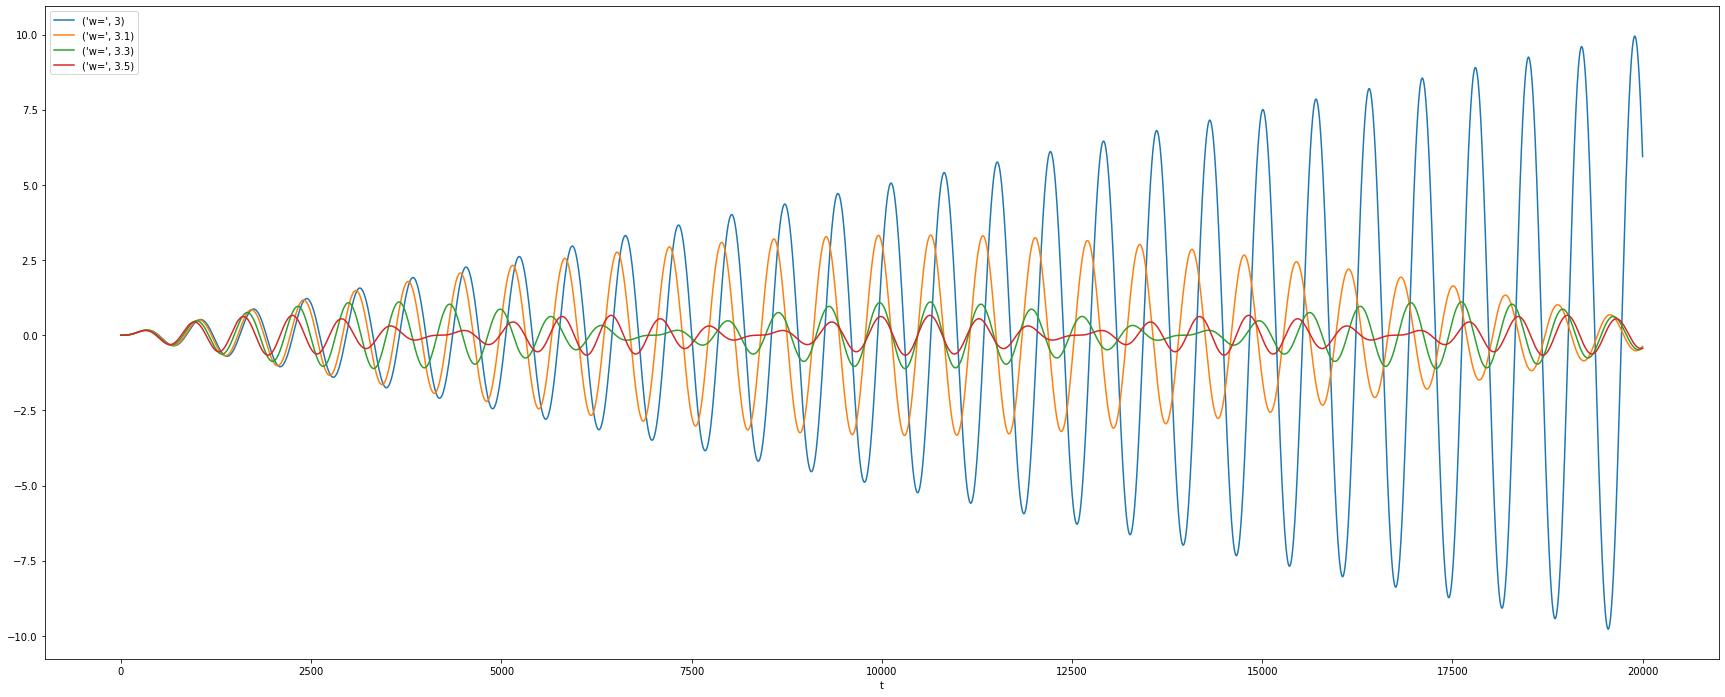

In [107]:
# Integración utilizando 'odeint'
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
import numpy as np

def VanderPol(y,t,Wn,C,w):
        x, p = y
        dydt = [p, (-2)*C*Wn*p+np.sin(w*t)-x*Wn**(2)]
        return dydt

t = np.linspace(0,60,20000)

k=9.
m=1.

Wn=np.sqrt(k/m)
C=0

t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [0, 0]



plt.figure(figsize=(30,12))

for w in [3,3.1,3.3,3.5]:
  sol=odeint(VanderPol, y_0, t, args=(Wn,C,w))
  y=sol[:,0] 
  plt.plot(y, label=('w=',w))
  plt.legend(loc='best')
  plt.xlabel('t')
  plt.grid()
plt.show()

**Problema 3.**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$. 

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado. 



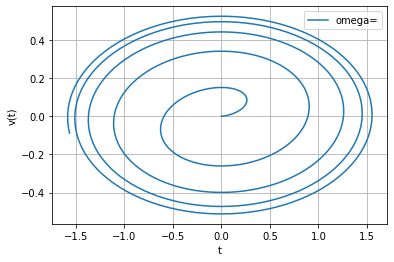

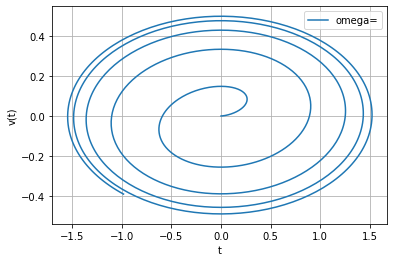

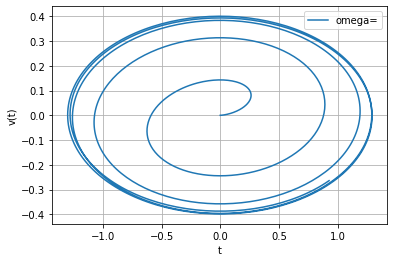

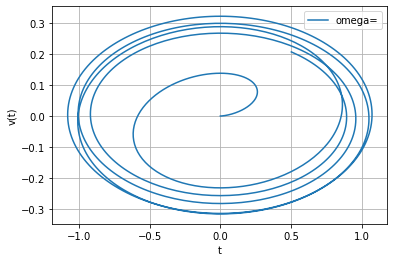

In [122]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
import numpy as np

def VanderPol(y,t,Wn,C,w):
        x, p = y
        dydt = [p, (-2)*C*Wn*p+np.sin(w*t)-x*Wn**(2)]
        return dydt

t = np.linspace(0,10,1000)

k=9.
m=1.

Wn=np.sqrt(k/m)
C=0.1

t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [0, 0]



w=3
sol=odeint(VanderPol, y_0, t, args=(Wn,C,w))
plt.plot(sol[:,1], sol[:, 0], label="omega=")
plt.legend(loc='best')
plt.ylabel("v(t)")
plt.xlabel('t')
plt.grid()
plt.show()

w=3.1
sol=odeint(VanderPol, y_0, t, args=(Wn,C,w))
plt.plot(sol[:,1], sol[:, 0], label="omega=")
plt.legend(loc='best')
plt.ylabel("v(t)")
plt.xlabel('t')
plt.grid()
plt.show()

w=3.3
sol=odeint(VanderPol, y_0, t, args=(Wn,C,w))
plt.plot(sol[:,1], sol[:, 0], label="omega=")
plt.legend(loc='best')
plt.ylabel("v(t)")
plt.xlabel('t')
plt.grid()
plt.show()

w=3.5
sol=odeint(VanderPol, y_0, t, args=(Wn,C,w))
plt.plot(sol[:,1], sol[:, 0], label="omega=")
plt.legend(loc='best')
plt.ylabel("v(t)")
plt.xlabel('t')
plt.grid()
plt.show()

